<a href="https://colab.research.google.com/github/nick01as/MNIST-Neural-Network-from-Scratch/blob/main/MNIST_Neural_Network_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Import Libraries
import pandas as pd
import numpy as np
import random
import math

# Read Data from Colab Data
data = pd.read_csv('/content/sample_data/mnist_train_small.csv')

# Splice data
X = data.drop(columns = ['6'])
y = data['6']

m,n = X.shape

def normalize(X): # Normalize Dataset: 255 -> [0,1)
  return X / 256

X = X.apply(normalize)

# Test_train_data split
X_train = np.array(X.iloc[:int(0.8 * len(X.index))]).T
y_train = np.array(y.iloc[:int(0.8 * len(y.index))]).T
X_test = np.array(X.iloc[int(0.8 * len(X.index)):len(data.index)]).T
y_test = np.array(y.iloc[int(0.8 * len(y.index)):len(data.index)]).T

Functions Cell

In [32]:
# ReLu
def ReLu(X):
  return np.maximum(0, X)

# Derivative of ReLu
def derivReLu(X):
  return (X > 0).astype(int)

# Softmax
def softmax(X):
  return np.exp(X)/sum(np.exp(X))

# Cross entropy (debug use)
def crossEntropy(prob, one_hot_array):
  maxLoc = np.argmax(one_hot_array,axis = 0)
  return np.sum(-1 * np.log(prob[maxLoc]))

# Find derivative of cross entropy
def derivCrossEntropy(prob, one_hot_array):
  return prob - one_hot_array

# One hot encode
def one_hot(Y):
  one_hot_array = np.zeros((10, len(Y)))
  for i in range(len(Y)):
    one_hot_array[Y[i]][i] = 1
  return one_hot_array

# Layer in NN
class layer:
  def __init__ (self, inputNodes, outputNodes): # Initialize random weights [-0.5,0.5]
    self.weight = np.random.rand(outputNodes,inputNodes) - 0.5
    self.bias = np.random.rand(outputNodes, 1) - 0.5

  def forwardProp(self, input): # Forward Prop
    self.input = input
    self.preactive = self.weight.dot(input) + self.bias
    self.active = ReLu(self.preactive)

  def outputProp(self, input): # Forward Prop last layer
    self.input = input
    self.preactive = self.weight.dot(input) + self.bias
    self.active = softmax(self.preactive)

  def backProp(self, gradError): # Backward Prop
    self.dWeight = 1 / m * gradError.dot(self.input.T)
    self.dBias = 1 / m * np.sum(gradError)

  def update(self, alpha): # Update params
    self.weight -= alpha * self.dWeight
    self.dBias -= alpha * self.dBias

# Calculate Accuracy
def get_accuracy(pred, real):
  return np.sum(np.argmax(pred, axis = 0) == real) / len(real)


In [33]:
epochs = 500
# Iteration counter
i = 0
# Use 2048 for higher accuracy
batch_size = 4096

# Define NN Layers
layer1 = layer(784,10)
outputLayer = layer(10,10)

# Train Model
while i < epochs:
  j = 0
  while j + batch_size < len(X_train[0]):
    X_train_batch = X_train.T[j : j + batch_size]

    # Forward Prop
    layer1.forwardProp(X_train)
    outputLayer.outputProp(layer1.active)

    one_hot_array = one_hot(y_train) # One hot encode

    # Backward Prop
    gradError = derivCrossEntropy(outputLayer.active, one_hot_array)
    outputLayer.backProp(gradError)
    gradError = np.multiply(outputLayer.weight.T.dot(gradError),derivReLu(layer1.preactive))
    layer1.backProp(gradError)
    
    # Update (Learning Rate = 0.1)
    layer1.update(0.1)
    outputLayer.update(0.1)

    if j == 0:
      print("Epoch: ", i)
      print((get_accuracy(outputLayer.active, y_train)))
    j += batch_size
  i+=1


Epoch:  0
0.0742546409150572
Epoch:  1
0.12969560597537347
Epoch:  2
0.16176011000687543
Epoch:  3
0.19157447340458778
Epoch:  4
0.2140758797424839
Epoch:  5
0.2325145321582599
Epoch:  6
0.24995312207012937
Epoch:  7
0.26526657916119756
Epoch:  8
0.28058003625226574
Epoch:  9
0.2965810363147697
Epoch:  10
0.3147071691980749
Epoch:  11
0.331583223951497
Epoch:  12
0.34702168885555346
Epoch:  13
0.35908494280892556
Epoch:  14
0.3713357084817801
Epoch:  15
0.3827114194637165
Epoch:  16
0.39321207575473466
Epoch:  17
0.4034627164197762
Epoch:  18
0.4147134195887243
Epoch:  19
0.425401587599225
Epoch:  20
0.435027189199325
Epoch:  21
0.44527782986436654
Epoch:  22
0.45615350959434964
Epoch:  23
0.4674042127632977
Epoch:  24
0.47909244327770484
Epoch:  25
0.4904056503531471
Epoch:  26
0.5032814550909431
Epoch:  27
0.5155322207637978
Epoch:  28
0.5267829239327458
Epoch:  29
0.5389086817926121
Epoch:  30
0.5494093380836302
Epoch:  31
0.5590349396837302
Epoch:  32
0.5698481155072193
Epoch:  33


In [34]:
# Run Test Data
layer1.forwardProp(X_test)
outputLayer.outputProp(layer1.active)

print(get_accuracy(outputLayer.active, y_test))

0.879


2


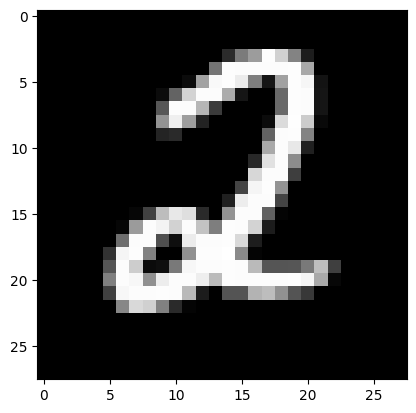

In [36]:
from matplotlib import pyplot as plt

print(np.argmax(outputLayer.active,axis = 0)[0])
first_example = (X_test.T)[0].reshape((28,28))
first_example = plt.imshow(first_example, cmap = 'gray')
plt.show(first_example)